<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install neograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import tensorflow as tf
from sklearn.datasets import make_circles

#MAke 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)


In [25]:
#checking features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [26]:
#Check the lables 
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [27]:
import matplotlib.pyplot as plt
import pandas as pd



In [28]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1':X[:,1], 'label': y})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


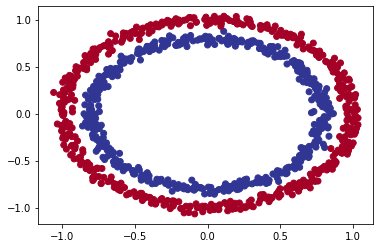

In [29]:
plt.scatter(X[:, 0], X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [30]:
#Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [31]:
#how many samples
len(X), len(y)

(1000, 1000)

In [32]:
#View first example of each
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# X_train, X_test, y_train, y_test, test

In [35]:
#build in modeling
tf.random.set_seed(42)
model = tf.keras.Sequential([
    # tf.keras.input_shape(),
    # tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#fit the model
model.fit(tf.expand_dims(X,axis=1), y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0436 - accuracy: 0.4978
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9939 - accuracy: 0.4955


In [36]:
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6953 - accuracy: 0.4900


[0.6952507495880127, 0.49000000953674316]

In [37]:
#Since we are working on binary classication model and we have 50% accuracy. its preforming as its guessing. so lets add an extra layer
tf.random.set_seed(42)

#build model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

#Compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#fit the model
model2.fit(X,y, epochs = 100, verbose=0)

In [38]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4970


[0.6931822896003723, 0.4970000088214874]

In [18]:
#trying to improve more
tf.random.set_seed(42)

#build
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

#Fit
model3.fit(X,y,epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 1.0162 - accuracy: 0.4800
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5010
Epoch 3/500
32/32 [==============================] - 0s 5ms/step - loss: 0.7019 - accuracy: 0.4750
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4940
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.5030
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.5240
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.4930
Epoch 8/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5160
Epoch 9/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.4840
Epoch 10/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.4680
Epoch 11/

In [19]:
import numpy as np

In [20]:
# #function to viz model predictions, create meshgrid, make predictoins, and plot predictions as well as a line between each zone
# def plot_decision_boundary(model, X, y):
#   """
#   plots decision boundary created by a model predicting on X
#   """

#   #define axis boundaries and create meshgrid
#   x_min, x_max = X[:,0].min()- 0.1, X[:,0].max() + 0.1
#   y_min, y_max = X[:,1].min()- 0.1, X[:,1].max() + 0.1

#   xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))
  
#   #create X value to make predictions
#   x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d arrays together

#   #Make predicitions
#   y_pred = model.predict(x_in)

#   #check for multiclass
#   if len(y_pred[0]) > 1:
#     print('doing multiclass classification')
#     # we have to reshape out predicition to get them ready for plotting
#     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#   else:
#     print('Doing binary classification')
#     y_pred = np.round(y_pred).reshape(xx.shape)

#   #plot the decision boundary
#   plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#   plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())



In [1]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


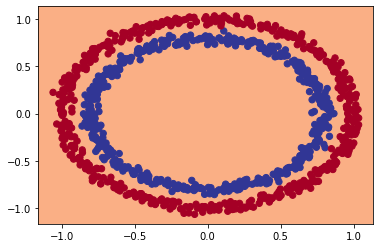

In [22]:
#checking out prediction the model is making
plot_decision_boundary(model=model3,
                       X=X,
                       y=y)

In [41]:
#Lets try on some regression data
tf.random.set_seed(42)

X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100,1100, 5) #y=x+100

X_regression, y_regression

#split train and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit the model
model3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

We need to switch from classicification compiler to regression 
need to change model to suit the data


In [44]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
model4.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['mae'])

#Fit the model
model4.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


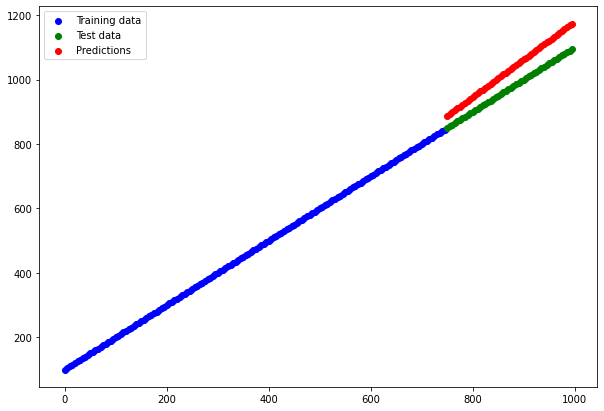

In [46]:
# make a pred on trained model
y_reg_preds = model4.predict(X_reg_test)

#Plot the models predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b',label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label ='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')

plt.legend();

In [51]:
#lets build no linearity model
tf.random.set_seed(42)

#build model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    # tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(1)
])

#compile the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

#fit the model
history = model5.fit(tf.expand_dims(X, axis=1), y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0436 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9939 - accuracy: 0.4955
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9648 - accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9209 - accuracy: 0.4964
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8381 - accuracy: 0.4983
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8105 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6779 - accuracy: 0.5000
Epoch 11/100
32/32 [=

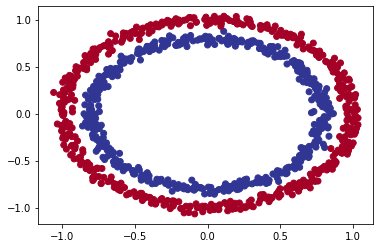

In [52]:
#check data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


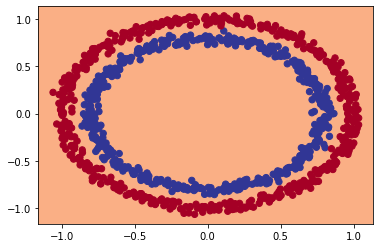

In [53]:
plot_decision_boundary(model=model5,X=X,y=y)

In [56]:
#Actaully non linear model this time
tf.random.set_seed(42)

#model
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

#Compile the model
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit
history = model6.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.7030 - accuracy: 0.4951
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1184 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7191 - accuracy: 0.4969
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.5028
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4992
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4972
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4982
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4971
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4902
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4989
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


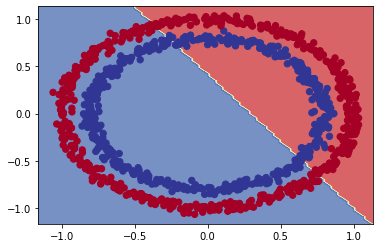

In [57]:
plot_decision_boundary(model=model6, X=X, y=y)

In [62]:
from pandas.core.reshape.melt import lreshape
#really make it non linear
tf.random.set_seed(42)

#build
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit
history1 = model7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


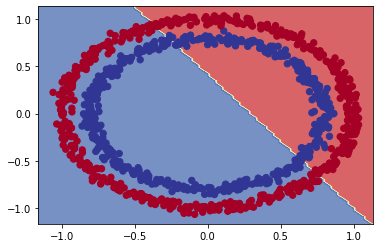

In [63]:
plot_decision_boundary(model=model6, X=X, y=y)

In [64]:
 #final model
tf.random.set_seed(42)

#build model
model8= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

#compile
model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit
model8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


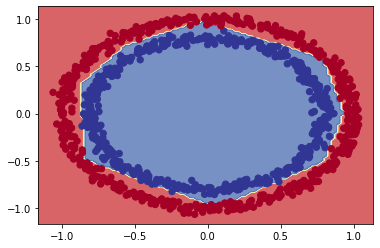

In [65]:
plot_decision_boundary(model=model8,
                       X=X,y=y)

the combination of linear and non linear is one of the key fundamentals of nueral networks


In [66]:
#create toy tensor similar to the data in modle
A=tf.cast(tf.range(-10,10), tf.float32)

In [67]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

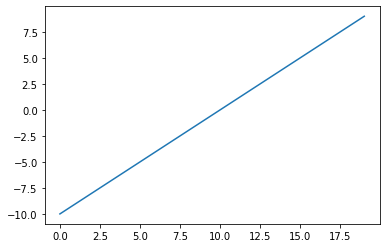

In [68]:
#visualizer toy tensor
plt.plot(A)

In [69]:
def sigmoids(x):
  return 1 / (1 +tf.exp(-x))

In [71]:
sig_a= sigmoids(A)

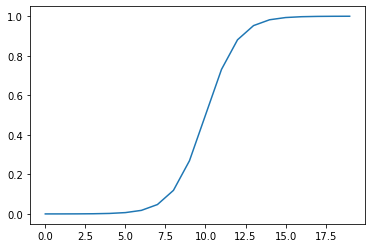

In [73]:
plt.plot(sig_a)

In [74]:
def relu(x):
  return tf.maximum(0,x)

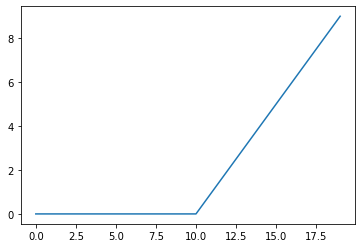

In [76]:
plt.plot(relu(A))